In [1]:
# ============================================
# Cell 1 - Imports and basic configuration
# ============================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

# Improve plot style
sns.set(style="whitegrid", context="notebook")

# Create plots directory
os.makedirs("plots", exist_ok=True)


In [2]:
# ============================================
# Cell 2 - Load dataset and first inspection
# ============================================

df = pd.read_csv("employee_burnout.csv")

print("Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataFrame Info:")
print(df.info())


Shape: (1000, 7)

First 5 rows:


,employee_id,work_hours,mental_fatigue_score,job_satisfaction,resource_availability,company_support,burnout
0,1,48.973713,2.507343,1.876275,6.834862,2.291225,1
1,2,43.893886,1.941111,1.146885,1.666949,2.363010,0
2,3,50.181508,6.727872,1.432103,4.379220,4.894943,1
3,4,57.184239,7.358282,2.355443,8.234331,6.361118,1
4,5,43.126773,1.284275,4.210343,4.901250,1.725539,0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            1000 non-null   int64  
 1   work_hours             1000 non-null   float64
 2   mental_fatigue_score   1000 non-null   float64
 3   job_satisfaction       1000 non-null   float64
 4   resource_availability  1000 non-null   float64
 5   company_support        1000 non-null   float64
 6   burnout                1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB
None


In [3]:
# ============================================
# Cell 3 - Cleaning and sanity checks
# ============================================

# Check missing values
print("Missing values per column:")
print(df.isna().sum())

# Check target distribution
print("\nTarget distribution (burnout):")
print(df["burnout"].value_counts())

# Ensure it's binary classification
print("\nUnique target values:", df["burnout"].unique())


Missing values per column:
employee_id              0
work_hours               0
mental_fatigue_score     0
job_satisfaction         0
resource_availability    0
company_support          0
burnout                  0
dtype: int64

Target distribution (burnout):
burnout
1    538
0    462
Name: count, dtype: int64

Unique target values: [1 0]


Statistical Summary:


,employee_id,work_hours,mental_fatigue_score,job_satisfaction,resource_availability,company_support,burnout
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,45.155587,5.532839,2.977980,5.439133,5.452542,0.538000
std,288.819436,7.830682,2.595212,1.155679,2.571187,2.600182,0.498803
min,1.000000,20.000000,1.028964,1.000047,1.000276,1.002043,0.000000
25%,250.750000,39.819278,3.224792,2.026094,3.235791,3.164121,0.000000
50%,500.500000,45.202405,5.645134,2.966842,5.405576,5.354482,1.000000
75%,750.250000,50.183551,7.716868,3.954516,7.610551,7.745429,1.000000
max,1000.000000,75.821852,9.994724,4.991283,9.996019,9.972545,1.000000


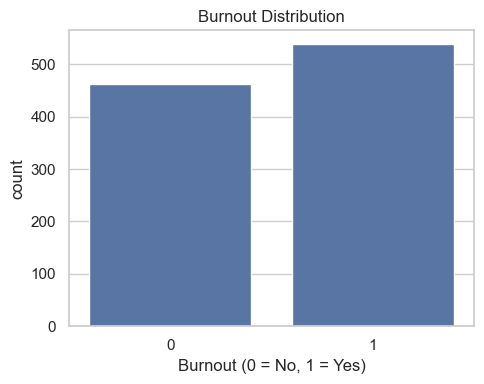

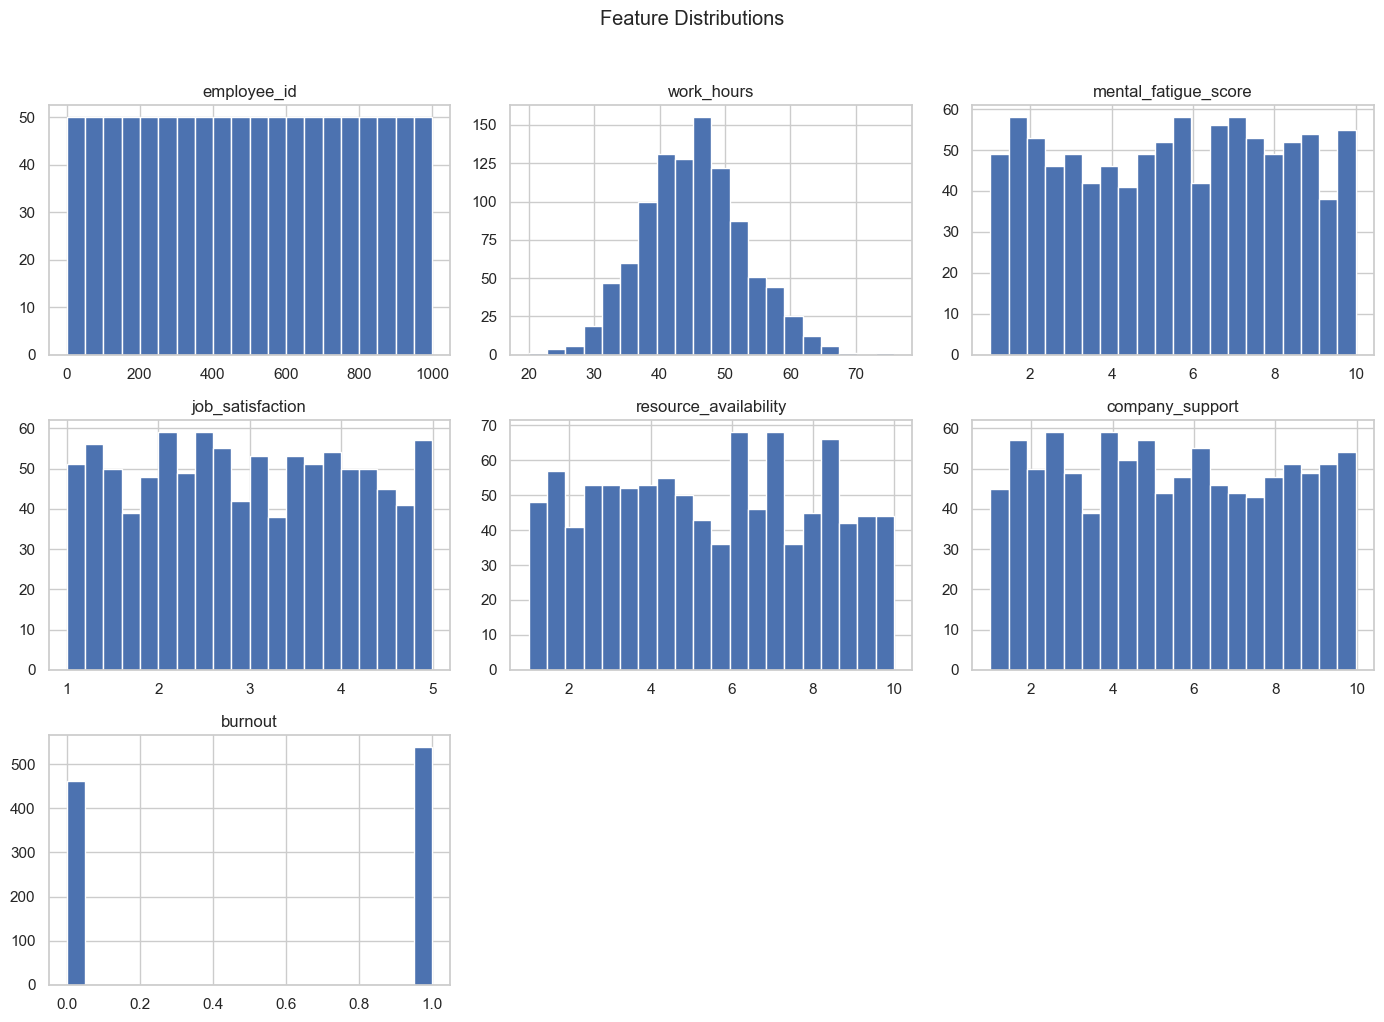

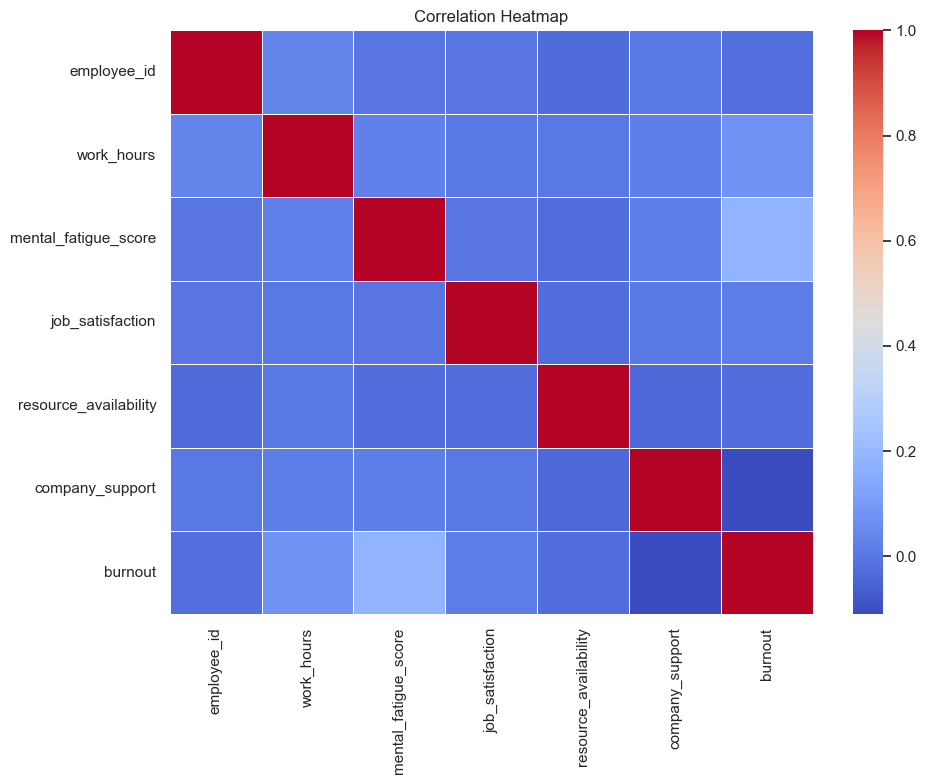

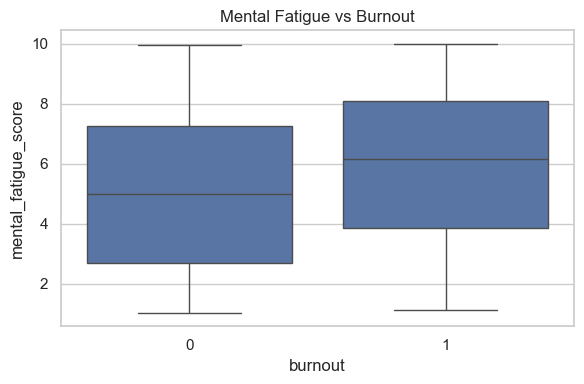

In [4]:
# ============================================
# Cell 4 - Exploratory Data Analysis (EDA)
# ============================================

# Statistical summary
print("Statistical Summary:")
display(df.describe())

# 4.1 Burnout Distribution
plt.figure(figsize=(5,4))
sns.countplot(x="burnout", data=df)
plt.title("Burnout Distribution")
plt.xlabel("Burnout (0 = No, 1 = Yes)")
plt.tight_layout()
plt.savefig("plots/burnout_distribution.png")
plt.show()

# 4.2 Histograms of features
df.hist(figsize=(14,10), bins=20)
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.savefig("plots/feature_histograms.png")
plt.show()

# 4.3 Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("plots/correlation_heatmap.png")
plt.show()

# 4.4 Boxplot: Mental Fatigue vs Burnout
plt.figure(figsize=(6,4))
sns.boxplot(x="burnout", y="mental_fatigue_score", data=df)
plt.title("Mental Fatigue vs Burnout")
plt.tight_layout()
plt.savefig("plots/boxplot_fatigue_burnout.png")
plt.show()


In [5]:
# ============================================
# Cell 5 - Train-test split and scaling
# ============================================

X = df.drop("burnout", axis=1)
y = df["burnout"]

print("Target distribution before split:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTrain target distribution:")
print(y_train.value_counts())

print("\nTest target distribution:")
print(y_test.value_counts())

# Scaling for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Target distribution before split:
burnout
1    538
0    462
Name: count, dtype: int64

Train shape: (800, 6)
Test shape: (200, 6)

Train target distribution:
burnout
1    430
0    370
Name: count, dtype: int64

Test target distribution:
burnout
1    108
0     92
Name: count, dtype: int64


Logistic Regression Accuracy: 0.6800

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.51      0.59        92
           1       0.66      0.82      0.74       108

    accuracy                           0.68       200
   macro avg       0.69      0.67      0.67       200
weighted avg       0.69      0.68      0.67       200



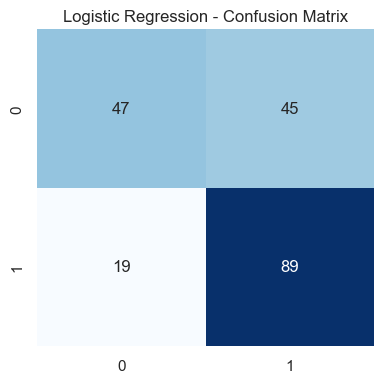

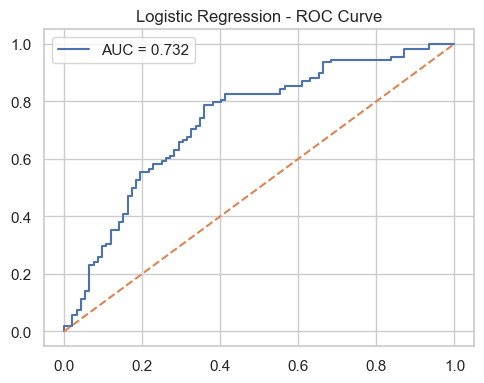

In [6]:
# ============================================
# Cell 6 - Logistic Regression model
# ============================================

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(4,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression - Confusion Matrix")
plt.tight_layout()
plt.savefig("plots/lr_confusion_matrix.png")
plt.show()

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

plt.figure(figsize=(5,4))
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {auc_lr:.3f}")
plt.plot([0,1], [0,1], "--")
plt.title("Logistic Regression - ROC Curve")
plt.legend()
plt.tight_layout()
plt.savefig("plots/lr_roc_curve.png")
plt.show()


Random Forest Accuracy: 0.6900

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        92
           1       0.69      0.76      0.73       108

    accuracy                           0.69       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.69      0.69      0.69       200



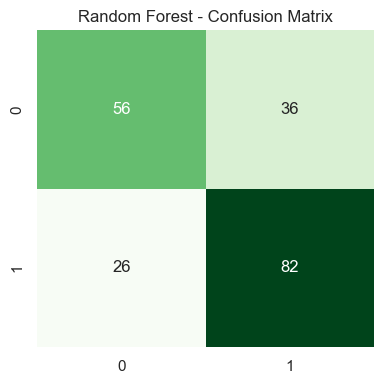

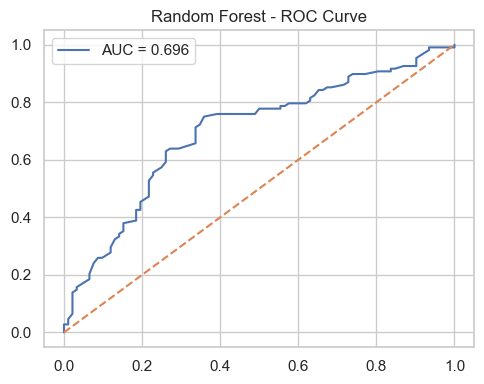

In [7]:
# ============================================
# Cell 7 - Random Forest model
# ============================================

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.tight_layout()
plt.savefig("plots/rf_confusion_matrix.png")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(5,4))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {auc_rf:.3f}")
plt.plot([0,1], [0,1], "--")
plt.title("Random Forest - ROC Curve")
plt.legend()
plt.tight_layout()
plt.savefig("plots/rf_roc_curve.png")
plt.show()


In [8]:
# ============================================
# Cell 8 - Model comparison
# ============================================

print("Model Comparison:\n")
print(f"Logistic Regression: Accuracy = {acc_lr:.4f}, AUC = {auc_lr:.4f}")
print(f"Random Forest:       Accuracy = {acc_rf:.4f}, AUC = {auc_rf:.4f}")


Model Comparison:

Logistic Regression: Accuracy = 0.6800, AUC = 0.7321
Random Forest:       Accuracy = 0.6900, AUC = 0.6963
